In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, AvgPool1D, BatchNormalization
from tensorflow.keras.optimizers import Adam

# -----------------------------------
# 1. Load and Preprocess the Dataset
# -----------------------------------

In [46]:
# Load the dataset from the CSV file
df = pd.read_csv('air_quality_with_AQI.csv')

# Drop the 'Date(D/M/YYYY)' column as it's not needed for modeling
df = df.drop('Date(D/M/YYYY)', axis=1)

# Separate features (X) and target variable (y)
X = df.drop('AQI', axis=1)  # Features: PM2.5, PM10, O3, NO2, SO2
y = df['AQI']  # Target: AQI

# Normalize the features using MinMaxScaler to scale them between 0 and 1
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Reshape the input data for CNN (samples, time steps, features)
# Here, we treat each feature as a single time step
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


# -----------------------------------
# 2. Initialize Regression Models
# -----------------------------------

In [49]:
# Initialize Machine Learning Models
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=500, max_depth=10)
et_model = ExtraTreesRegressor(random_state=42, n_jobs=-1, n_estimators=500, max_depth=10)
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
lgbm_model = LGBMRegressor(random_state=42, n_jobs=-1, n_estimators=500, max_depth=10, learning_rate=0.1,force_col_wise=True)
xgb_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=500, max_depth=10, learning_rate=0.1)
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Define and compile Deep Learning Models
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))  # Input layer
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Define and compile the Convolutional Neural Network model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Create three different neural network architectures
dnn_model = create_model(X_train.shape[1])  # Deep NN
cnn_model = create_cnn_model(X_train_reshaped.shape[1:])

# -----------------------------------
# 3. Train the Models and Record History (for Deep Learning)
# -----------------------------------

In [50]:
# Train Machine Learning Models
print("Training Machine Learning Models...RF")
rf_model.fit(X_train, y_train)
print("Training Machine Learning Models...ET")
et_model.fit(X_train, y_train)
print("Training Machine Learning Models...DT")
dt_model.fit(X_train, y_train)
print("Training Machine Learning Models...LGBM")
lgbm_model.fit(X_train, y_train)
print("Training Machine Learning Models...XGB")
xgb_model.fit(X_train, y_train)
print("Training Machine Learning Models...SVM")
svm_model.fit(X_train, y_train)

# Train Deep Learning Models and store the training history
print("Training Deep Learning Models...DNN")
history1 = dnn_model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1, validation_split=0.1)
print("Training Deep Learning Models...CNN")
history_cnn = cnn_model.fit(X_train_reshaped, y_train, epochs=200, batch_size=32, verbose=1, validation_split=0.1)

Training Machine Learning Models...RF
Training Machine Learning Models...ET
Training Machine Learning Models...DT
Training Machine Learning Models...LGBM
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 1315, number of used features: 5
[LightGBM] [Info] Start training from score 238.853992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

# -----------------------------------
# 4. Make Predictions on the Test Set
# -----------------------------------

In [51]:


# Predictions using Machine Learning Models
print("Making predictions with Machine Learning Models...RF")
rf_test_preds = rf_model.predict(X_test)
print("Making predictions with Machine Learning Models...ET")
et_test_preds = et_model.predict(X_test)
print("Making predictions with Machine Learning Models...DT")
dt_test_preds = dt_model.predict(X_test)
print("Making predictions with Machine Learning Models...LGBM")
lgbm_test_preds = lgbm_model.predict(X_test)
print("Making predictions with Machine Learning Models...XGB")
xgb_test_preds = xgb_model.predict(X_test)
print("Making predictions with Machine Learning Models...SVM")
svm_test_preds = svm_model.predict(X_test)

# Predictions using Deep Learning Models
print("Making predictions with Deep Learning Models...DNN")
y_test_pred_dense = dnn_model.predict(X_test)
print("Making predictions with Deep Learning Models...CNN")
y_test_pred_cnn = cnn_model.predict(X_test_reshaped)

Making predictions with Machine Learning Models...RF
Making predictions with Machine Learning Models...ET
Making predictions with Machine Learning Models...DT
Making predictions with Machine Learning Models...LGBM
Making predictions with Machine Learning Models...XGB
Making predictions with Machine Learning Models...SVM
Making predictions with Deep Learning Models...DNN
11/11 [==============================] - 0s 3ms/step
Making predictions with Deep Learning Models...CNN
11/11 [==============================] - 0s 3ms/step


# -----------------------------------
# 5. Evaluate Model Performance
# -----------------------------------

In [52]:
# Function to evaluate model performance using RMSE and R2
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)  # R-squared (coefficient of determination)
    return {"Model": model_name, "RMSE": rmse, "R2": r2}

# Evaluate all models
results = [
    evaluate_model(y_test, rf_test_preds, "Random Forest"),
    evaluate_model(y_test, et_test_preds, "Extra Trees"),
    evaluate_model(y_test, dt_test_preds, "Decision Tree"),
    evaluate_model(y_test, lgbm_test_preds, "LightGBM"),
    evaluate_model(y_test, xgb_test_preds, "XGBoost"),
    evaluate_model(y_test, svm_test_preds, "Support Vector Machine"),
    evaluate_model(y_test, y_test_pred_dense, "Deep Neural Network"),
    evaluate_model(y_test, y_test_pred_cnn, "Convolutional Neural Network")
]

# -----------------------------------
# 6. Compare Models and Identify the Best
# -----------------------------------

In [53]:

# Create a Pandas DataFrame for comparison
comparison_df = pd.DataFrame(results)

# Identify the best model based on R2 (higher is better) and RMSE (lower is better)
best_model_r2 = comparison_df.sort_values(by=["R2", "RMSE"], ascending=[False, True]).iloc[0]

# Display the comparison table
print("Model Comparison (RMSE and R2):\n")
print(comparison_df.to_markdown(index=False, numalign="left", stralign="left"))

# Highlight the best model
print(f"\nBest Model: {best_model_r2['Model']} with RMSE = {best_model_r2['RMSE']:.4f} and R2 = {best_model_r2['R2']:.4f}")

Model Comparison (RMSE and R2):

| Model                        | RMSE    | R2       |
|:-----------------------------|:--------|:---------|
| Random Forest                | 8.57164 | 0.988032 |
| Extra Trees                  | 8.90852 | 0.987073 |
| Decision Tree                | 9.42401 | 0.985534 |
| LightGBM                     | 12.087  | 0.976203 |
| XGBoost                      | 8.74515 | 0.987543 |
| Support Vector Machine       | 40.3869 | 0.734312 |
| Deep Neural Network          | 16.0851 | 0.957856 |
| Convolutional Neural Network | 18.1754 | 0.946191 |

Best Model: Random Forest with RMSE = 8.5716 and R2 = 0.9880


# -----------------------------------
# 7. Save the Results to a CSV File
# -----------------------------------

In [54]:
# Save the comparison DataFrame to a CSV file
comparison_df.to_csv("model_comparison_results.csv", index=False)
print("\nResults saved to 'model_comparison_results.csv'")


Results saved to 'model_comparison_results.csv'


# -----------------------------------
# 8. Plot Training History for Deep Learning Models
# -----------------------------------

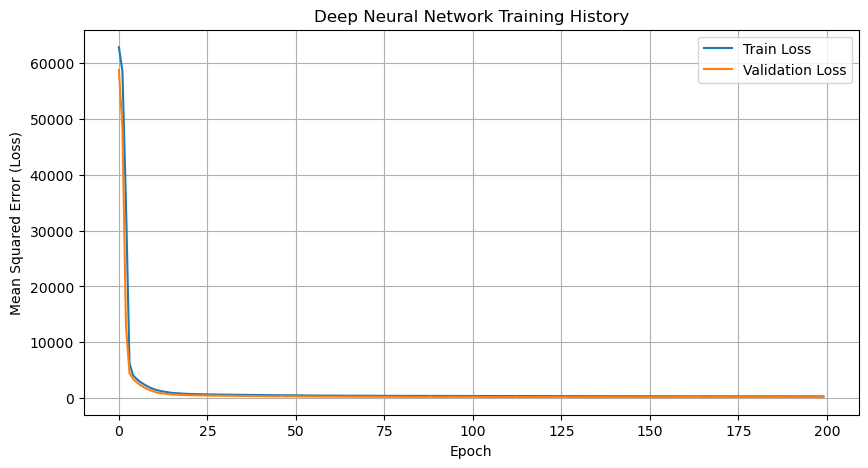

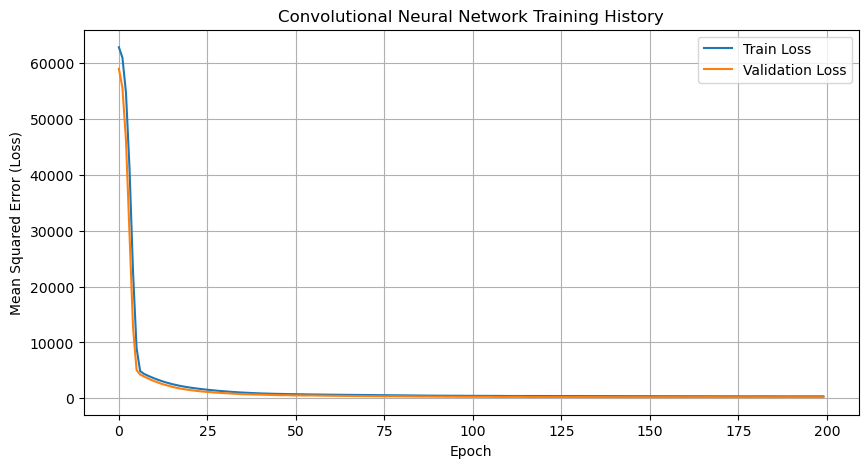


Training history plots for deep learning models have been saved as PNG files.


In [55]:

def plot_history(history, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error (Loss)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{model_name}_training_history.png')  # Save the plot
    plt.show()

# Plot training history for the deep learning models
plot_history(history1, "Deep Neural Network")
plot_history(history_cnn, "Convolutional Neural Network")

print("\nTraining history plots for deep learning models have been saved as PNG files.")